In [1]:
# Michael Morphew
# takes several TIFF images and arranges them into a single NumPy array for use in TensorFlow

import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage.transform import resize
import rasterio
import scipy

In [2]:
file_list = glob.glob('./ISPRS/top/top_mosaic_09cm_area*')
print(file_list)

['./ISPRS/top\\top_mosaic_09cm_area1.tif', './ISPRS/top\\top_mosaic_09cm_area10.tif', './ISPRS/top\\top_mosaic_09cm_area11.tif', './ISPRS/top\\top_mosaic_09cm_area12.tif', './ISPRS/top\\top_mosaic_09cm_area13.tif', './ISPRS/top\\top_mosaic_09cm_area14.tif', './ISPRS/top\\top_mosaic_09cm_area15.tif', './ISPRS/top\\top_mosaic_09cm_area16.tif', './ISPRS/top\\top_mosaic_09cm_area17.tif', './ISPRS/top\\top_mosaic_09cm_area2.tif', './ISPRS/top\\top_mosaic_09cm_area20.tif', './ISPRS/top\\top_mosaic_09cm_area21.tif', './ISPRS/top\\top_mosaic_09cm_area22.tif', './ISPRS/top\\top_mosaic_09cm_area23.tif', './ISPRS/top\\top_mosaic_09cm_area24.tif', './ISPRS/top\\top_mosaic_09cm_area26.tif', './ISPRS/top\\top_mosaic_09cm_area27.tif', './ISPRS/top\\top_mosaic_09cm_area28.tif', './ISPRS/top\\top_mosaic_09cm_area29.tif', './ISPRS/top\\top_mosaic_09cm_area3.tif', './ISPRS/top\\top_mosaic_09cm_area30.tif', './ISPRS/top\\top_mosaic_09cm_area31.tif', './ISPRS/top\\top_mosaic_09cm_area32.tif', './ISPRS/top\

In [3]:
top_total = np.zeros((len(file_list), 256, 256, 3))

In [4]:
for i in range(len(file_list)):
    img = plt.imread(file_list[i])
    img_reshaped = resize(img, (256, 256, 3))
    top_total[i] = img_reshaped

C:\Users\mdmor\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\mdmor\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [5]:
np.save('top.npy', top_total)

In [6]:
file_list = glob.glob('./ISPRS/dsm/dsm_09cm_matching_area*.tif')

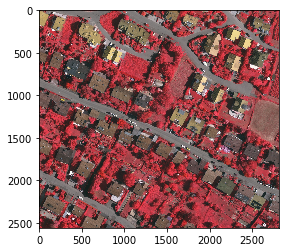

In [7]:
img = plt.imread('./ISPRS/top/top_mosaic_09cm_area13.tif')
plt.figure()
plt.imshow(img)

BoundingBox(left=497759.13, bottom=5419751.58, right=498012.75, top=5419981.8)
[[324.81445 324.84543 324.86172 ... 338.1746  338.1953  338.18082]
 [325.10583 325.14285 325.16046 ... 337.99756 338.06592 338.0747 ]
 [325.9872  326.0295  326.05045 ... 337.9472  337.981   337.9967 ]
 ...
 [284.65283 284.62747 284.6145  ... 300.05893 300.0583  300.05588]
 [284.72092 284.6932  284.6806  ... 300.06378 300.061   300.05725]
 [284.78586 284.7546  284.74518 ... 300.07086 300.06467 300.05853]]
343.33017
280.9257
(1, 2558, 2818)
[[0.96059339 0.78555132 0.61051851 ... 0.63587632 0.81802479 1.        ]
 [0.78592896 0.55226611 0.31872143 ... 0.331807   0.57482068 0.81755152]
 [0.61356824 0.32116034 0.02903732 ... 0.02832069 0.331828   0.635239  ]
 ...
 [0.53950049 0.28392521 0.02836881 ... 0.02858612 0.29787536 0.56716045]
 [0.69306131 0.48855529 0.28408922 ... 0.29791303 0.51333045 0.7287483 ]
 [0.84661636 0.69317854 0.53981816 ... 0.56723668 0.72878166 0.89033075]]
343.2695288085938
102.491007080078

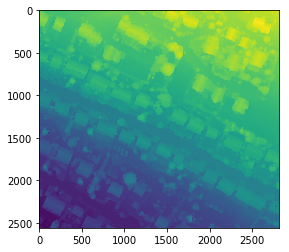

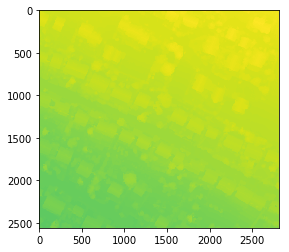

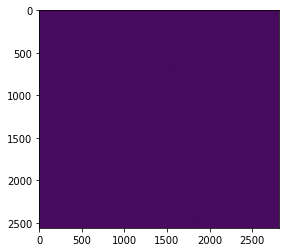

In [8]:
raster = rasterio.open(file_list[4])
data = raster.read()
print(raster.bounds)
plt.imshow(data[0,:,:])
print(data[0,:,:])
print(np.max(data[0,:,:]))
print(np.min(data[0,:,:]))
print(np.shape(data))

width = 5
Gaussian = np.ones((width, width))*1/width**2
smoothed_data = scipy.signal.convolve2d(data[0,:,:], Gaussian, mode='same')
filtered_data = data[0,:,:]-smoothed_data
filtered_data = (filtered_data-np.min(filtered_data))/(np.max(filtered_data)-np.min(filtered_data))
print(filtered_data)
plt.figure()
plt.imshow(smoothed_data)
plt.figure()
plt.imshow(filtered_data)
print(np.max(smoothed_data))
print(np.min(smoothed_data))
print(np.max(filtered_data))
print(np.min(filtered_data))

In [28]:
dsm_total = np.zeros((len(file_list), 256, 256, 1))
for i in range(len(file_list)):
    raster = rasterio.open(file_list[i])
    data = raster.read()
    width = 9
    Gaussian = np.ones((width, width))*1/width**2
    smoothed_data = scipy.signal.convolve2d(data[0,:,:], Gaussian, mode='same')
    filtered_data = data[0,:,:]-smoothed_data
    filtered_data = (filtered_data-np.min(filtered_data))/(np.max(filtered_data)-np.min(filtered_data))
    img_reshaped = resize(filtered_data, (256, 256, 1))
    dsm_total[i] = img_reshaped


In [29]:
print(np.shape(dsm_total))

(33, 256, 256, 1)


In [30]:
data_total = np.concatenate((top_total, dsm_total), axis=-1)

In [31]:
print(np.shape(data_total))

(33, 256, 256, 4)


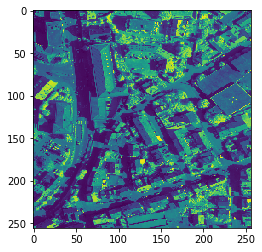

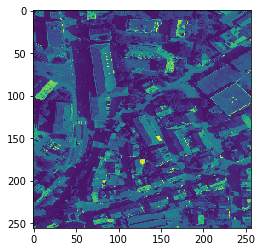

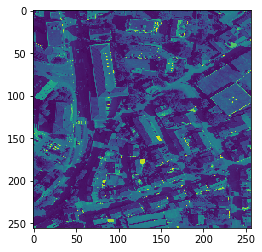

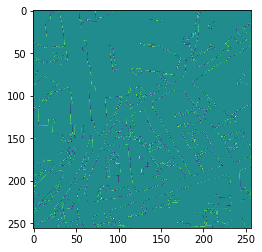

In [32]:
plt.figure()
plt.imshow(data_total[0,:,:,0])
plt.figure()
plt.imshow(data_total[0,:,:,1])
plt.figure()
plt.imshow(data_total[0,:,:,2])
plt.figure()
plt.imshow(data_total[0,:,:,3])

In [33]:
np.save('data.npy', data_total)

In [15]:
file_list = glob.glob('./ISPRS/gt/top_mosaic_09cm_area*')
print(file_list)

['./ISPRS/gt\\top_mosaic_09cm_area1.tif', './ISPRS/gt\\top_mosaic_09cm_area10.tif', './ISPRS/gt\\top_mosaic_09cm_area11.tif', './ISPRS/gt\\top_mosaic_09cm_area12.tif', './ISPRS/gt\\top_mosaic_09cm_area13.tif', './ISPRS/gt\\top_mosaic_09cm_area14.tif', './ISPRS/gt\\top_mosaic_09cm_area15.tif', './ISPRS/gt\\top_mosaic_09cm_area16.tif', './ISPRS/gt\\top_mosaic_09cm_area17.tif', './ISPRS/gt\\top_mosaic_09cm_area2.tif', './ISPRS/gt\\top_mosaic_09cm_area20.tif', './ISPRS/gt\\top_mosaic_09cm_area21.tif', './ISPRS/gt\\top_mosaic_09cm_area22.tif', './ISPRS/gt\\top_mosaic_09cm_area23.tif', './ISPRS/gt\\top_mosaic_09cm_area24.tif', './ISPRS/gt\\top_mosaic_09cm_area26.tif', './ISPRS/gt\\top_mosaic_09cm_area27.tif', './ISPRS/gt\\top_mosaic_09cm_area28.tif', './ISPRS/gt\\top_mosaic_09cm_area29.tif', './ISPRS/gt\\top_mosaic_09cm_area3.tif', './ISPRS/gt\\top_mosaic_09cm_area30.tif', './ISPRS/gt\\top_mosaic_09cm_area31.tif', './ISPRS/gt\\top_mosaic_09cm_area32.tif', './ISPRS/gt\\top_mosaic_09cm_area33.

In [16]:
img = plt.imread(file_list[0])
print(img.shape)

(2569, 1919, 3)


In [17]:
mask_total = np.zeros((len(file_list), 256, 256, 3))
for i in range(len(file_list)):
    img = plt.imread(file_list[i])
    img_reshaped = resize(img, (256, 256, 3))
    mask_total[i] = img_reshaped


In [18]:
mask_total[mask_total>=0.5] = 1
mask_total[mask_total<0.5] = 0

In [19]:
img_mask = np.zeros((len(file_list),256,256,6))
for k in range(len(file_list)):
    for i in range(256):
        for j in range(256):
            # impervious surface
            if(mask_total[k,i,j,0]==1 and mask_total[k,i,j,1]==1 and mask_total[k,i,j,2]==1):
                img_mask[k,i,j,0]=1
            # building
            elif(mask_total[k,i,j,0]==0 and mask_total[k,i,j,1]==0 and mask_total[k,i,j,2]==1):
                img_mask[k,i,j,1]=1
            # low vegetation
            elif(mask_total[k,i,j,0]==0 and mask_total[k,i,j,1]==1 and mask_total[k,i,j,2]==1):
                img_mask[k,i,j,2]=1
            # tree
            elif(mask_total[k,i,j,0]==0 and mask_total[k,i,j,1]==1 and mask_total[k,i,j,2]==0):
                img_mask[k,i,j,3]=1
            # car
            elif(mask_total[k,i,j,0]==1 and mask_total[k,i,j,1]==1 and mask_total[k,i,j,2]==0):
                img_mask[k,i,j,4]=1
            # clutter/background
            elif(mask_total[k,i,j,0]==1 and mask_total[k,i,j,1]==0 and mask_total[k,i,j,2]==0):
                img_mask[k,i,j,5]=1
                

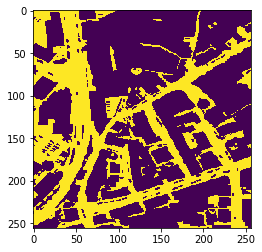

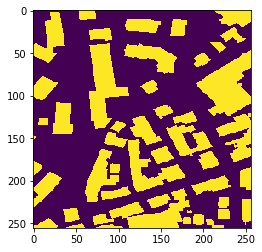

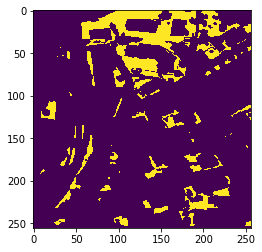

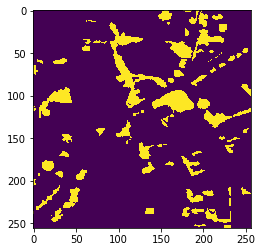

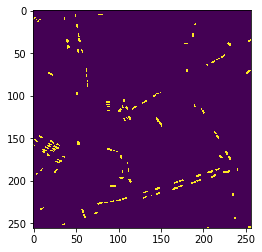

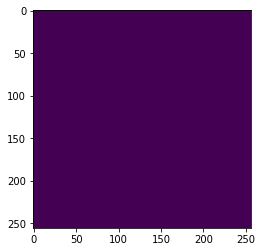

In [20]:
plt.figure()
plt.imshow(img_mask[0,:,:,0])
plt.figure()
plt.imshow(img_mask[0,:,:,1])
plt.figure()
plt.imshow(img_mask[0,:,:,2])
plt.figure()
plt.imshow(img_mask[0,:,:,3])
plt.figure()
plt.imshow(img_mask[0,:,:,4])
plt.figure()
plt.imshow(img_mask[0,:,:,5])

In [21]:
np.save('multi_mask.npy', img_mask)

In [22]:
print(file_list)

['./ISPRS/gt\\top_mosaic_09cm_area1.tif', './ISPRS/gt\\top_mosaic_09cm_area10.tif', './ISPRS/gt\\top_mosaic_09cm_area11.tif', './ISPRS/gt\\top_mosaic_09cm_area12.tif', './ISPRS/gt\\top_mosaic_09cm_area13.tif', './ISPRS/gt\\top_mosaic_09cm_area14.tif', './ISPRS/gt\\top_mosaic_09cm_area15.tif', './ISPRS/gt\\top_mosaic_09cm_area16.tif', './ISPRS/gt\\top_mosaic_09cm_area17.tif', './ISPRS/gt\\top_mosaic_09cm_area2.tif', './ISPRS/gt\\top_mosaic_09cm_area20.tif', './ISPRS/gt\\top_mosaic_09cm_area21.tif', './ISPRS/gt\\top_mosaic_09cm_area22.tif', './ISPRS/gt\\top_mosaic_09cm_area23.tif', './ISPRS/gt\\top_mosaic_09cm_area24.tif', './ISPRS/gt\\top_mosaic_09cm_area26.tif', './ISPRS/gt\\top_mosaic_09cm_area27.tif', './ISPRS/gt\\top_mosaic_09cm_area28.tif', './ISPRS/gt\\top_mosaic_09cm_area29.tif', './ISPRS/gt\\top_mosaic_09cm_area3.tif', './ISPRS/gt\\top_mosaic_09cm_area30.tif', './ISPRS/gt\\top_mosaic_09cm_area31.tif', './ISPRS/gt\\top_mosaic_09cm_area32.tif', './ISPRS/gt\\top_mosaic_09cm_area33.